# Programming for Data Analysis Assignment 2020

Module: Programming For Data Analysis <br>
Student Name: John Kavanagh  <br>
Lecturer: Brian McGinley  <br>

The purpose of this assignment is to performa a dissection of the structure of the Numpy.Random package and to explain the interdependeencies of these sections through practical examples of code blocks as well as a visual component. 

The areas to be reviewed and analysed are laid out as follows, similar in pattern to the official Numpy documentation.

### Area for discussion

- Explain the overall purpose of the packag
- Explain the use of the simple random data function. 
- Explain the use of Permutations Funcitons. 
- Explain the use and purpose of at least five distributions functions. 
- Explain the use of seeds in generations pseudorandom numbers.


While there is an extensive amount of information available, and a large amount of research conducted in this area, the primary area of investigation will be conducted on the official Numpy Documentation catalogue listed [here](https://numpy.org/doc/stable/reference/random/index.html)

___

### Software Requirements

There were a number of pieces of software that are required in order to run this analysis. These are: 

1. Anaconda
2. Jupyter Notebook
3. Numpy
4. MatPlotLib
5. Seaborn


In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

___

Having Reviewed the layout of the question and distilling what has been requested, as well as reviewing the information that has been laid out by the documentation from the Numpy site, the analysis will be given the following structure.

### Structure of the Analysis

#### Section 1 Overview of Numpy.Random
- Structure of the package
    - State & Seeding

#### Section 2 Review of Simple Random Data
- Four Key Areas of Simple Random Data

#### Section 3 Review of Permutations
- Permutations and Shuffle

#### Section 4 Leveraging Numpy.Random for Distrubtions
- Deep dive into distributiuons and implementation of plotting

#### Section 5 Conclusion
- Recap on Sections 1-3

#### Section 6 Bibliography
- Reference Material

___

### Section 1 Overview of Numpy.Random

#####  Structure of the Numpy.Random Package


The principle purpose of the package is random number generation, as per [Numpy.org](https://numpy.org/doc/stable/reference/random/index.html?highlight=numpy%20random#quick-start). Numpy, as per the latest edition of the package, has been updated to include several upgrades in the package. Principle among these, is the introduction of the Permuted Congruential Generator 64 as the default pseudo random number generator. Otherwise known as PCG64, it supports the methods for how random number generation operates [Numpy.Org](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html\0)


Within it's hierarchail structure, the numpy package is divided into two core parts, *BitGenerators* and *Generators*. 
We will be at first reviewing the Bitgenerator, via some sample code to demonstrate the packages capabilities.<br>

The relationship between th BitGenerator and the Generator allows for random sampling to occur across numerous distributions.

##### BitGenerator

As per the official documentation on the [numpy.org](https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.html#numpy.random.BitGenerator) the bit generator performs a very limited number of tasks within the numpy.random pakage, but that are crucial nonetheless. Amongst these though, is the management of the state as well as functions that will allow for random 32bit and 64bit values.

The BitGenerator creates sequences for the package. These sequences are in turn used by the Generator to sample distrubitons that are being created, such as a Zipf, Binomial and Gaussian distribution. These Distributions will be explained later on in the analysis under Section 4. 

The default BitGenerator for the most recent numpy package release is the PCG64. 

For further information on this, please review [here](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64)

###### State & Seeding
Now that we understand that the BitGenerator provides a stream of numbers, we need to understand, how seeds are used and facilitate the random number generationm otherwise known as pseudorandom numbers. In order for the BitGenerator to proudce random numbers, it needs to first have it's state initialised by a seed. This process is completed via a process called Seed-Sequence. <br>

Seed Sequence is responsible for setting this initial state. It completes this task, via a process of entropy, which can be reviewed via this [link](https://numpy.org/doc/1.19/reference/random/bit_generators/generated/numpy.random.SeedSequence.html#numpy.random.SeedSequence).

In [6]:
import numpy as np

In [7]:
np.random.BitGenerator

numpy.random.bit_generator.BitGenerator

In [8]:
from numpy.random import Generator, PCG64, SeedSequence
sg = SeedSequence(1234)
rg = [Generator(PCG64(s)) for s in sg.spawn(10)]

This is the source for a BitGenerator test.
Source [numpy.org](https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.random_raw.html#numpy.random.BitGenerator.random_raw)<br> 

In order to initiate a new instance of a generator, we must use the following code as well as calling a method, to gather information on the distrubtion

In [9]:
from numpy.random import default_rng

In [10]:
# what is it you're trying to prove here - give it a reason or get rid.

In [11]:
rg = default_rng(12)
rg.random()

0.2508244581084461

In [12]:
rng = np.random.default_rng()

In [13]:
vals = rng.standard_normal(10)
more_vals = rng.standard_normal(10)

In [14]:
from numpy.random import Generator, PCG64
rg = Generator(PCG64(12345))
rg.standard_normal()

-1.4238250364546312

##### Generator



Following on from the bitgenerator, we have the generator, which is actually a container for the Bitgenerator.

In [15]:
np.random.default_rng()

Generator(PCG64) at 0x19677192A90

In [16]:
# The default_rng is a method that allows us to run a request on the BitGenerator

___

### Section 2 Review of Simple Random Data
#### Simple Random Data

We have seen from the structured nature of this package, that there are a  number of interdependencies in order for it to run successfully. Next, as part of our analysis into the package, we have the area of simple random data. 
There are four core sections to this section of the package. They are:  

1. Integers
2. Random
2. Choice
4. Bytes

Each section has it's own capabilities added to it to make it distinguishable from the last, as we will see in due course.

These can be reviewed more extensively from [Numpy.org](https://numpy.org/doc/stable/reference/random/generator.html)

In [64]:
rng = np.random.default_rng()

We use the code in the text box above,  in order to best set ourselves up to test the code to follow. Whereby hte rng on the left hand side, stands for random number generator

##### 1.Integers 

Integers as a data type, being used within the numpy.random package. The same as a lot of other functions, the integer subsection of the random funcoint, is dependent on an understanding of its' parameters. i.e, what information we will place into the funciton in order to generate an output. 

In [53]:
rng.integers(0, 10, size=20)

array([9, 7, 4, 2, 4, 9, 8, 2, 7, 1, 7, 9, 4, 5, 1, 1, 2, 4, 0, 8],
      dtype=int64)

In [55]:
x = rng.integers(0, 10, size=20)

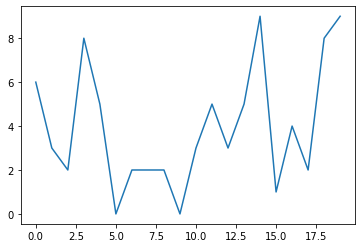

In [56]:
plt.plot(x)

In the code above, we can see that there are three parameters, that have been passed into the funciton.
Firstly, we have 'low' integer, this is the lowest starting point for what will be generated in the output. In this case it is 0. Next, we have the 'high' integer, which is exclusive. This means that the random numbers generated will not take, in this instance, 10, into the output. Lastly, we have the third parameter, Size. Size, in this context, relates to the number of random numbers to be generated in the ouput.

For further examples of this case, please review the [Numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers) site.

##### 2.Random

As true as it was for Integers, we're dependent upon the parameters, in order to extract the return from the Random Subsection. In this instance, the random funciton will allow for floating points to be taken into consideration. Floating points can be reviewed via clicking ont he following link, should you require more informaiton on them, via [TechTerms](https://techterms.com/definition/floatingpoint#:~:text=As%20the%20name%20implies%2C%20floating,decimal%20places%20are%20called%20integers.). 

The output of the random function will be an an integer between 0.0-1.0. What we produce inside the brackets, will be in relation to its' size. 
In teh example below we will create  a 7 x 3 matrix.

For further examples of this case, please review the [Numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)

In [19]:
type(rng.random())

float

In [ ]:
# create  an array with seven rows and three columns.

In [66]:
rng.random((7,3))

array([[0.75505361, 0.34205837, 0.27148126],
       [0.8506489 , 0.52962514, 0.5031133 ],
       [0.04167262, 0.74662775, 0.57869598],
       [0.74892439, 0.80168712, 0.29951899],
       [0.38367337, 0.76577519, 0.20429394],
       [0.46229797, 0.54750586, 0.66266623],
       [0.86574957, 0.03795044, 0.56676795]])

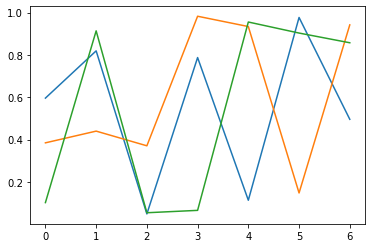

In [67]:
 b = rng.random((7,3))
plt.plot(b)

##### 3.Choice

Choice has been created with the understanding of creating a single item, or an array for an output. What differentiates it from previosu iterations ofthe package, is that we can code into the parameter an array, for its consideration. The package, however, will not taek in an integer of negative value.  

For more information on the Choice subsection , please review the following link from [Numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice)

In [21]:
rng.choice(9, (2,5))

array([[2, 5, 5, 3, 1],
       [1, 1, 1, 7, 6]], dtype=int64)

In the example listed above, we have our integer value inserted in the code, in this it is 1. Within the second paramter, we have a list, of type int. This list will form the structure of the output. Working with the brackets, we have the number of arrays that will be generated, 2, in this case, as well as the number of number of numbers that will be randomly chosen within these arrays.

We have also mentioned that we can take into the function, a string. If we create a list of data type string, as follows:

In [86]:
Cars_Manu = ['Audi', 'Seat', 'VW']
Bike_Manu = ['Fondriest', 'Campognolo', 'Liv', 'Giant']
e = np.arange(100)
f = np.arange(2000)

In [87]:
print(rng.choice(Cars_Manu, 10))
print(rng.choice(Bike_Manu, 10))
print(rng.choice(e, 8))

['VW' 'VW' 'VW' 'Audi' 'VW' 'VW' 'Audi' 'VW' 'Audi' 'VW']
['Campognolo' 'Liv' 'Campognolo' 'Campognolo' 'Giant' 'Liv' 'Campognolo'
 'Liv' 'Fondriest' 'Campognolo']
[99 93  2 31 98 15 48 96]


We can see from the array created above that there are multiple instances of the one manufactures name, as the size of the array exceeds the parameters in the variable Cars_Manu.

ValueError: x and y must be the same size

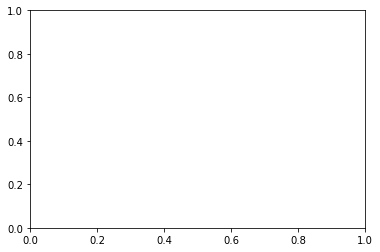

In [88]:
c = rng.choice(Cars_Manu, 100)
d = rng.choice(Bike_Manu, 100)

plt.scatter(e, f)

##### 4.Bytes

The last of the four subsections within the Simple Data funciton, bytes, is used to return just that, bytes. 
The parameter for this snippet of code is limited to one, and that is length of type integer. 

For more information on this subsection, please review the link via [numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes)


In [24]:
rng.bytes(7)

b'.\xf2\xe7\xbc\x13.\xec'

This is string of length 7, as hard coded into the line.

____

### Section 3 Review of Permutations



Within this segement of the package, we are going to be reviewing teo types of order that we can put an array through. 
They are:
- Shuffle
- Permutations

To permute, simply means to change the order of something, as per [Merriam Webster](https://www.merriam-webster.com/dictionary/permutate#:~:text=%3A%20change%2C%20interchange%20especially%20%3A%20to%20arrange%20in%20a%20different%20order)

##### Shuffle

In order to shuffle a list of integers, we must set up our code to accept the integer, as follow.

For more information on this, please review [Numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html#numpy.random.shuffle)

For further reading on the reshape function, please visit [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle).

In [90]:
Shuf = np.arange(20)

In [91]:
# Set up a variable called Shuf which is a list of numbers up to, but excluding 20

In [94]:
np.random.shuffle(Shuf)

In [95]:
# we then take this variable, and apply the shuffle function to it.

In [96]:
Shuf

array([12, 13, 10,  7, 16, 15,  4,  8,  3, 14, 17,  5,  0,  9, 18, 11, 19,
        6,  2,  1])

We can see from the array that has been returned from the codeblock, that there are 20 integers in the array. You will also see that there is no number 20 in this list, as the list has commenced from the number 0.

In [111]:
Shuf = np.arange(36).reshape((6, 6))
np.random.shuffle(Shuf)
Shuf

array([[30, 31, 32, 33, 34, 35],
       [24, 25, 26, 27, 28, 29],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [ 6,  7,  8,  9, 10, 11],
       [ 0,  1,  2,  3,  4,  5]])

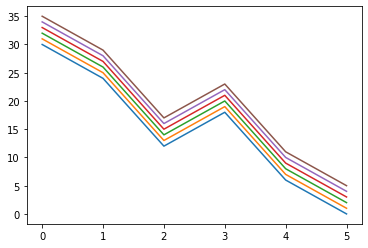

In [112]:
g = Shuf
plt.plot(g)

We can also add in the reshape funciton, so that we can create multiple arrays, based on the common denominators that comprise an integer. In the exmaple displayed above, we ahve shuffled through the 15 numbers and divided them into 5 seperate arrays, of 3 numbers each. This is only possible as 5 multiplied by 3 is equal to the number set out in the parameter.

##### Permutations

Similar in its basis to shuffle, the permutations function will accept a integer as well as an array as a parameter. 

For more inforamtion on this topic, please review [Numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation)

In [29]:
# If we take the basis for our analysis as: 
rng = np.random.default_rng()

In [30]:
# and we try to run through a permutation of an integer, 7. 
rng.permutation(7) 

array([0, 4, 3, 6, 5, 2, 1])

In [31]:
# we can also perform the permutation on an array [1, 2, 3, 4, 5, 6, 7]

In [32]:
rng.permutation([1, 2, 3, 4, 5, 6, 7])

array([7, 4, 1, 3, 2, 5, 6])

___

### Section 4 Leveraging Numpy.Random for Distrubtions

The objective of this exercise is to review at elast five different types of distribution.

The five types of distribution that we are going to review are: 

- Binomial
- Chi-Square
- Standard T
- Normal (Gaussian) Distribution
- Zipf


##### Binomial Distribution Overview

For more information [Numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial)

Binomial distributuion refers to an event where there are two outcomes from the event. The most common example of a binomial distribtion is the toss of a coin. We can set up our analysis as follows:

In [33]:
# number of trials
n = 10

In [34]:
# Probability of event occuring
p = 0.5

In [35]:
result = rng.binomial(n, p, 100)

In [36]:
result

array([6, 4, 5, 2, 6, 5, 4, 5, 7, 6, 4, 6, 4, 5, 4, 5, 5, 5, 4, 4, 3, 4,
       4, 2, 3, 4, 6, 7, 4, 5, 6, 7, 5, 8, 3, 5, 6, 3, 6, 6, 6, 6, 6, 6,
       6, 7, 8, 7, 5, 2, 4, 5, 3, 3, 8, 6, 7, 5, 5, 7, 7, 2, 4, 4, 5, 5,
       2, 6, 6, 6, 7, 5, 3, 5, 8, 5, 2, 3, 5, 5, 4, 4, 5, 5, 6, 5, 9, 5,
       5, 6, 4, 7, 4, 4, 6, 5, 4, 5, 3, 4], dtype=int64)

In [37]:
# we can see fromt eh paramter above the number 100. This represents the number of times the trial occured. 
# That is, there were 10 tosses of a coin completed 100 times.

##### Plotting the data

##### Chi-Square Distribution Overview

This distribution test has been created in order to test teh degrees of freedom. Thse degrees of freedom are measured via the sum of squared standard deviates of the distribution. 

For more information on this, please review [OnlineStatbook](http://onlinestatbook.com/2/chi_square/distribution.html). The code in the block below was retrieved from: [numpy.Org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.chisquare.html#numpy.random.Generator.chisquare)

In [38]:
rng.chisquare(12,4)

array([ 4.09975233,  9.03409262, 22.77968347,  9.00376844])

##### Plotting the data

###### Standard T 

Th Standard T sitribution devlops on in some ways from Ch-Square, in that it encompasses degrees of freedom. 
The T-Distribution, also refered to as the Student's T Distribution according to [Stat Trek](https://stattrek.com/probability-distributions/t-distribution.aspx). This distrubtiuon is briguht in when the sample isn't as large as would be expceted, whilst the variance is also unkonwn. 

> Side Note: "The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student." as retrieved from [numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_t.html#numpy.random.Generator.standard_t) 

The t Score information can be retrieved from teh site [Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_t.html#numpy.random.Generator.standard_t)

In [39]:
Collection = np.array([123, 456, 789, 987, 654, 321])

In [40]:
s = rng.standard_t(10, size=100000)

# where 10 is the degrees of freedom

In [41]:
np.mean(Collection)

555.0

In [42]:
Collection.std(ddof=1)

316.9738159533055

In [43]:
t = (np.mean(Collection)-7725)/(Collection.std(ddof=1)/np.sqrt(len(Collection)))

#### Plotting The data

##### Normal (Gaussian) Distrubtion

The normal distrubtion is enacted when there is a need to observe a large array of information across a spectrum. These, when placed in a plot, are observed as a bell curve distribution. Such is ht eimportanc eof this bell curve distrubtion, to be viewed, we nbeed to ensure that we have access to the centre of the curve. i.e. Create a Mean and Standard Deviation.

For more information on the normal distrubtion [numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal)

In [44]:
a = 0

# this can be our mean

In [45]:
b = 0.2

# this can be our standard deviation


In [46]:
# Therefore

c = rng.normal(a, b, 100)

In [47]:
# Validate mean and the variance 

abs(a - np.mean(c))

0.01249472899864164

In [48]:
abs(c - np.std(c, ddof = 1))

array([0.30638683, 0.00557159, 0.22110307, 0.22911718, 0.17655865,
       0.36435136, 0.09179145, 0.52016163, 0.14390148, 0.17425437,
       0.17250714, 0.55368631, 0.30233776, 0.06051554, 0.23146027,
       0.39791815, 0.10183768, 0.43810671, 0.03711933, 0.05739272,
       0.21877364, 0.02364798, 0.32497065, 0.32112168, 0.47406682,
       0.16951552, 0.03314798, 0.10827672, 0.06476497, 0.70436145,
       0.28330582, 0.15757878, 0.12793509, 0.44301203, 0.34195722,
       0.11379193, 0.18530776, 0.19294712, 0.13272832, 0.49842467,
       0.44084511, 0.32296306, 0.00550644, 0.00704275, 0.4335677 ,
       0.34241617, 0.3006927 , 0.15385642, 0.07428344, 0.07183958,
       0.26122002, 0.3010366 , 0.09898477, 0.17846823, 0.21903056,
       0.02268551, 0.07431783, 0.13305248, 0.39999844, 0.36108354,
       0.42092649, 0.10209031, 0.04239662, 0.07165762, 0.41977783,
       0.22850475, 0.17210672, 0.18966632, 0.10534757, 0.13360634,
       0.24856866, 0.35851085, 0.27298335, 0.2438973 , 0.12033

#### Plotting the data

##### Zipf Distribution

The Zipf distribtion is based around the principles of Zipf's Law, whereby the law states that: The Frequebcy of an item is inversely proportional to its rank  in a frequency table. 

For more information on the Zipf Distribution, please review [numpy.org](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.zipf.html#numpy.random.Generator.zipf)

In [49]:
d = 4

In [50]:
Zipf = rng.zipf(a, 1000)

ValueError: a <= 1 or a is NaN

#### Plotting the data     

___

### Section 5 Conclusion

___

### Section 6 Bibliography


<br>

Official Numpy site, November 2020

https://numpy.org/doc/stable/reference/random/index.html?highlight=numpy%20random#module-numpy.random
<br>
Markdown Style Guide, November 2020

https://www.markdownguide.org/basic-syntax/
<br>
Binomial Distribution 

https://www.datacamp.com/community/tutorials/probability-distributions-python
<br>
Explanantion of Tuple 

https://www.programiz.com/python-programming/tuple
<br>
Explanation of Chi-Square Rule

http://onlinestatbook.com/2/chi_square/distribution.html
<br>

Explanation of Students T Distribution

https://stattrek.com/probability-distributions/t-distribution.aspx
<br>

Explamnation of where PCG64 originates
https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html
<br>


 